##Beer Consumption - Sao Paulo

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.

The objective of this work will be to demonstrate the impacts of variables on beer consumption in a given region and the consumption forecast for certain scenarios. The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average).

###Importar Data

In [0]:
import pandas as pd

In [16]:
df = pd.read_csv("Consumo_cerveja(2).csv") # sin "," sale como string numeros con ,
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [17]:
df["Temperatura Media (C)"]

0       27,3
1      27,02
2      24,82
3      23,98
4      23,82
       ...  
936      NaN
937      NaN
938      NaN
939      NaN
940      NaN
Name: Temperatura Media (C), Length: 941, dtype: object

In [18]:
df = pd.read_csv("Consumo_cerveja(2).csv",decimal=',') # sin "," sale como string numeros con ,
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [19]:
df["Temperatura Media (C)"]

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
936      NaN
937      NaN
938      NaN
939      NaN
940      NaN
Name: Temperatura Media (C), Length: 941, dtype: float64

In [20]:
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [0]:
df = df.dropna() # elimina filas con valores nulos

In [22]:
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [23]:
df["Consumo de cerveja (litros)"]

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: object

In [0]:
df['Consumo de cerveja (litros)']=df['Consumo de cerveja (litros)'].astype(float)

In [0]:
del df["Data"]

In [26]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [0]:
X = df.drop(["Consumo de cerveja (litros)"],axis=1)
y = df['Consumo de cerveja (litros)']

In [30]:
X

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,27.30,23.9,32.5,0.0,0.0
1,27.02,24.5,33.5,0.0,0.0
2,24.82,22.4,29.9,0.0,1.0
3,23.98,21.5,28.6,1.2,1.0
4,23.82,21.0,28.3,0.0,0.0
...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0
361,22.64,21.1,26.7,0.0,0.0
362,21.68,20.3,24.1,10.3,0.0
363,21.38,19.3,22.4,6.3,0.0


In [31]:
y

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
360    32.307
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumo de cerveja (litros), Length: 365, dtype: float64

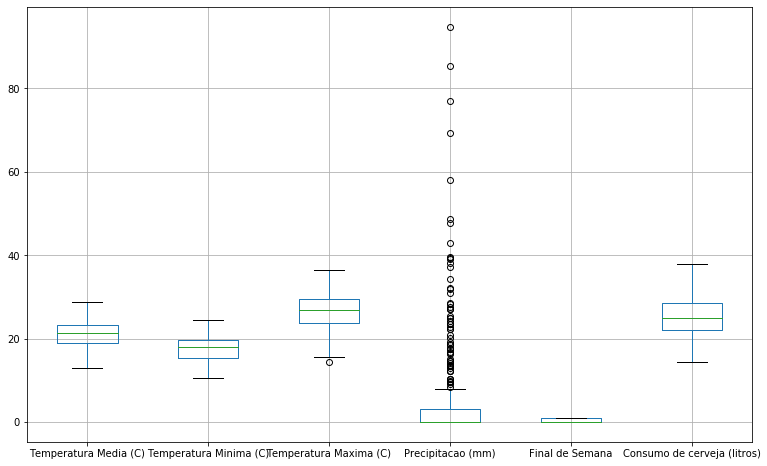

In [40]:
df.boxplot(figsize=(13,8)) # ancho y largo de la figura

ELIMINAR OUTLIER

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperatura Media (C)          4.260
Temperatura Minima (C)         4.300
Temperatura Maxima (C)         5.600
Precipitacao (mm)              3.200
Final de Semana                1.000
Consumo de cerveja (litros)    6.623
dtype: float64


In [0]:
df_modificado = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # ó==| , ~ (negativo),  analizamos lo q esta dentro de boxplot

In [43]:
df_modificado.shape

(300, 6)

In [44]:
df.shape

(365, 6)

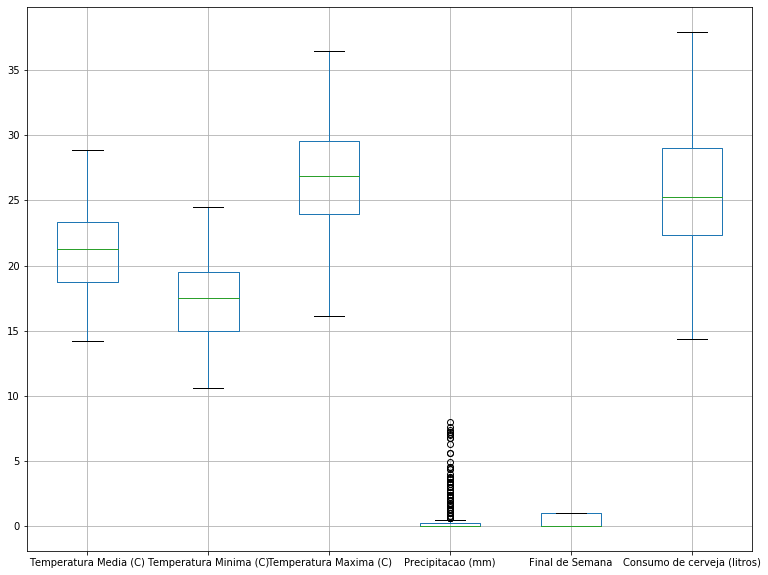

In [45]:
df_modificado.boxplot(figsize=(13,10))

Z_SCORE

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [47]:
z

array([[1.9125079 , 2.28133264, 1.365781  , 0.41906194, 0.63124277,
        0.01357418],
       [1.8243397 , 2.49392438, 1.59772167, 0.41906194, 0.63124277,
        0.81277978],
       [1.1315896 , 1.74985329, 0.76273528, 0.41906194, 1.58417656,
        1.23207249],
       ...,
       [0.14284628, 1.0057822 , 0.58252056, 0.4115282 , 0.63124277,
        0.7039126 ],
       [0.04838036, 0.65146263, 0.97681969, 0.08896892, 0.63124277,
        1.12320531],
       [1.11269642, 0.97035024, 0.55398868, 0.41906194, 0.63124277,
        0.67272742]])

In [0]:
df_z = df[(z < 3).all(axis=1)]

In [50]:
df_z.shape

(357, 6)

In [51]:
df.shape

(365, 6)

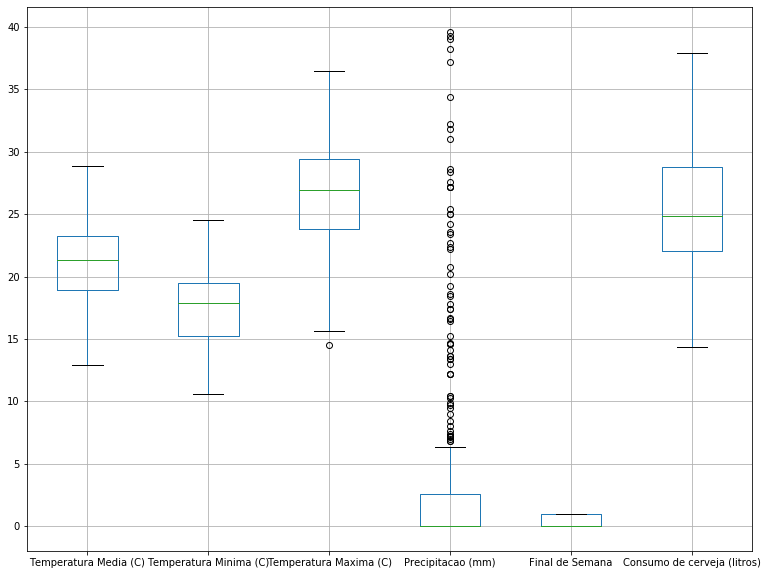

In [52]:
df_z.boxplot(figsize=(13,10))

separar la data

In [32]:
# separar data de entreamiento y rueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=5)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (292, 5)
X_test shape: (73, 5)


SIN ESTANDARIZAR

metodos
```

1.   REGRESION LINEAL


regresion lineal```




In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.score(X_train,y_train)

0.7291085016241441

In [35]:
reg.score(X_test,y_test)

0.6834891097121756



*   GRADIENTE DESCENDIENTE
*  



In [36]:
from sklearn import linear_model
gradiente = linear_model.SGDRegressor()
gradiente.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [37]:
gradiente.score(X,y)

-2.4132990576595384e+18

LAST SQUARE

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
reg.score(X,y)

0.7226497614758338